In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv("games.csv")

In [5]:
# To categorize the time formats in three categories for further analysis, you can use the following distinctions:
#Blitz game:Refers to fast-paced games with short time controls, typically around 3 to 10 minutes per player.
#Rapid game: Represents games with moderate time controls, usually ranging from 10 to 60 minutes per player.
#Classical game: Represents games with longer time controls, typically exceeding 60 minutes per player.
data['category']=data['increment_code'].str.split("+").str[0].astype(int)
data['increment']=data['increment_code'].str.split("+").str[1].astype(int)

In [6]:
data.drop("increment_code",axis=1,inplace=True)

In [7]:
def categorize_chess_game(increment):
    if 0<=increment<10:
        return "blitz"
    elif 10<=increment<=60:
        return "rapid"
    else:
        return "classical"

In [8]:
data['category']=data['category'].apply(categorize_chess_game)

In [9]:
data.head(2)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   

   white_id  white_rating   black_id  black_rating  \
0  bourgris          1500       a-00          1191   
1      a-00          1322  skinnerua          1261   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   

                             opening_name  opening_ply category  increment  
0        Slav Defense: Exchange Variation            5    rapid          2  
1  Nimzowitsch Defense: Kennedy Variation            4    blitz         10

In [10]:
data.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
category          0
increment         0
dtype: int64

In [11]:
data.duplicated().sum()

429

In [12]:
data.shape

(20058, 17)

In [13]:
data.describe()

created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply     increment  
count  20058.000000  20058.000000  
mean       4.816981      5.249626  
std        2.797152     14.289591  
min        1.000000      0.000000  
25%        3.000000      0.000000  
50%        4.000000      0.000000  
75%        6.000000      7.000000  
max       28.000000    180.000000

In [14]:
data.describe(include="object")

id victory_status winner white_id black_id  moves opening_eco  \
count      20058          20058  20058    20058    20058  20058       20058   
unique     19113              4      3     9438     9331  18920         365   
top     XRuQPSzH         resign  white  taranga  taranga  e4 e5         A00   
freq           5          11147  10001       72       82     27        1007   

                opening_name category  
count                  20058    20058  
unique                  1477        3  
top     Van't Kruijs Opening    rapid  
freq                     368    15779

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.reset_index(drop=True)

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
19624  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
19625  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
19626  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
19627  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
19628  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner       white_id  white_rating            black_id  black_rating  \
0      white       bourgris          1500                a-00          1191   
1      black           a-00          1322           skinnerua          1261   
2      white         ischia          1496                a-00          1500   
3      white  daniamurashov          1439        adivanov2009          1454   
4      white      nik221107          1523        adivanov2009          1469   
...      ...            ...           ...                 ...           ...   
19624  white        belcolt          1691            jamboger          1220   
19625  black       jamboger          1233  farrukhasomiddinov          1196   
19626  white       jamboger          1219        schaaksmurf3          1286   
19627  white   marcodisogno          1360            jamboger          1227   
19628  black       jamboger          1235               ffbob          1339   

                                                   moves opening_eco  \
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1      d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2      e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3      d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4      e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   
...                                                  ...         ...   
19624  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...         A80   
19625  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...         A41   
19626  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...         D00   
19627  e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...         B07   
19628  d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...         D00   

                                 opening_name  opening_ply category  increment  
0            Slav Defense: Exchange Variation            5    rapid          2  
1      Nimzowitsch Defense: Kennedy Variation            4    blitz         10  
2       King's Pawn Game: Leonardis Variation            3    blitz         10  
3      Queen's Pawn Game: Zukertort Variation            3    rapid          0  
4                            Philidor Defense            5    rapid          3  
...                                       ...          ...      ...        ...  
19624                           Dutch Defense            2    rapid         10  
19625                            Queen's Pawn            2    rapid          0  
19626         Queen's Pawn Game: Mason Attack            3    rapid          0  
19627                            Pirc Defense            4    rapid          0  
19628         Queen's Pawn Game: Mason Attack            3    rapid          0  

[19629 rows x 17 columns]

In [17]:
data.victory_status.value_counts()

resign       10926
mate          6188
outoftime     1641
draw           874
Name: victory_status, dtype: int64

In [18]:
data["white_rating"]-data['black_rating']

0        309
1         61
2         -4
3        -15
4         54
        ... 
20053    471
20054     37
20055    -67
20056    133
20057   -104
Length: 19629, dtype: int64

In [19]:
data['rate_difference']=data["white_rating"]-data['black_rating']

In [20]:
data.head(1)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   

   white_id  white_rating black_id  black_rating  \
0  bourgris          1500     a-00          1191   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   

                       opening_name  opening_ply category  increment  \
0  Slav Defense: Exchange Variation            5    rapid          2   

   rate_difference  
0              309

In [21]:
data['rate_difference']=np.where(data['rate_difference']<-10,"black high rate",np.where(data['rate_difference']>10,"white high rate","almost same rate"))

In [22]:
data.head(1)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   

   white_id  white_rating black_id  black_rating  \
0  bourgris          1500     a-00          1191   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   

                       opening_name  opening_ply category  increment  \
0  Slav Defense: Exchange Variation            5    rapid          2   

   rate_difference  
0  white high rate

In [23]:
data['rate_difference'].value_counts()

white high rate     9366
black high rate     8871
almost same rate    1392
Name: rate_difference, dtype: int64

### 1. High rating than opponent is affect victory status?

In [24]:
data.groupby("rate_difference")[['winner']].value_counts()

rate_difference   winner
almost same rate  white      677
                  black      644
                  draw        71
black high rate   black     5414
                  white     3028
                  draw       429
white high rate   white     6087
                  black     2861
                  draw       418
dtype: int64

In [99]:
### this table show that majority of high rating players than their opponents won their games

### 2.What kind of chess category players prefer?

<AxesSubplot:>

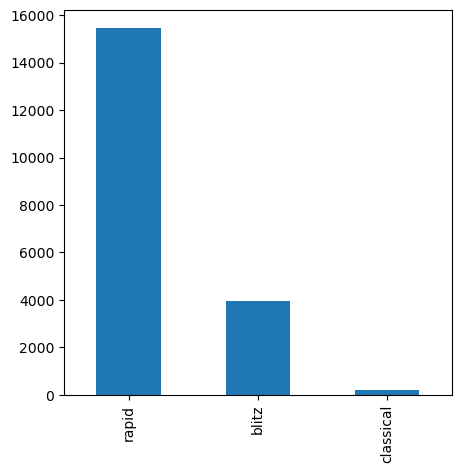

In [25]:
data.category.value_counts().plot(kind="bar",figsize=(5,5))

In [122]:
# this barplot shows that rapid game is the first option for players

### 3. Who are the top players?

In [26]:
topwhiteplayers = data['white_id'][data['winner'] == 'white'].value_counts()
topblackplayers = data['black_id'][data['winner'] == 'black'].value_counts()

In [27]:
data2 = pd.DataFrame(topwhiteplayers.append(topblackplayers), columns = ['Matches_Won'])

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\3702923510.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = pd.DataFrame(topwhiteplayers.append(topblackplayers), columns = ['Matches_Won'])


In [28]:
data2['Player_ID'] = data2.index

In [29]:
top_players=data2.groupby('Player_ID').sum().reset_index()

In [30]:
top_players.sort_values('Matches_Won', ascending=False, inplace = True)

In [31]:
top_players

Player_ID  Matches_Won
1564       chesscarl           45
2314    ducksandcats           43
4289        king5891           42
2253      doraemon61           38
480       anakgreget           36
...              ...          ...
4252          khalon            1
4251     khallahyari            1
4250         khalilk            1
4249  khaledalansary            1
8877          zzzbbb            1

[8878 rows x 2 columns]

In [32]:
bottom_white_players = data['white_id'][data['winner'] == 'black'].value_counts()
bottom_black_players = data['black_id'][data['winner'] == 'white'].value_counts()

In [33]:
data3 = pd.DataFrame(bottom_white_players.append(bottom_black_players), columns = ['Matches_lost'])

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\835126985.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = pd.DataFrame(bottom_white_players.append(bottom_black_players), columns = ['Matches_lost'])


In [34]:
data3['Player_ID'] = data3.index

In [35]:
data3

Matches_lost        Player_ID
bleda                      32            bleda
fandm-lancaster            22  fandm-lancaster
saviter                    22          saviter
sveenemand                 22       sveenemand
anakgreget                 20       anakgreget
...                       ...              ...
downmood                    1         downmood
omniomega77                 1      omniomega77
zizzygal                    1         zizzygal
anuj-8                      1           anuj-8
schaaksmurf3                1     schaaksmurf3

[10002 rows x 2 columns]

In [36]:
bottom_players=data3.groupby('Player_ID').sum().reset_index()

In [37]:
bottom_players.sort_values('Matches_lost', ascending=False, inplace = True)

In [38]:
bottom_players.reset_index(drop=True)

Player_ID  Matches_lost
0              saviter            42
1             nitsua49            39
2              taranga            39
3            erikweisz            38
4      fandm-lancaster            38
...                ...           ...
8460       hemanth0000             1
8461     hellyeah12345             1
8462  hellomyoldfriend             1
8463         hellcat62             1
8464           zzzimon             1

[8465 rows x 2 columns]

In [39]:
top_players.reset_index(drop=True)

Player_ID  Matches_Won
0          chesscarl           45
1       ducksandcats           43
2           king5891           42
3         doraemon61           38
4         anakgreget           36
...              ...          ...
8873          khalon            1
8874     khallahyari            1
8875         khalilk            1
8876  khaledalansary            1
8877          zzzbbb            1

[8878 rows x 2 columns]

In [40]:
all_matches=pd.merge(top_players,bottom_players,on="Player_ID",how="outer")

In [41]:
all_matches.fillna(0,inplace=True)

In [42]:
all_matches['Matches']=all_matches['Matches_Won']+all_matches['Matches_lost']

In [43]:
all_matches2=all_matches[all_matches['Matches']>10]

In [44]:
all_matches2.reset_index(drop=True)

Player_ID  Matches_Won  Matches_lost  Matches
0           chesscarl         45.0           1.0     46.0
1        ducksandcats         43.0          22.0     65.0
2            king5891         42.0          34.0     76.0
3          doraemon61         38.0           2.0     40.0
4          anakgreget         36.0          38.0     74.0
..                ...          ...           ...      ...
617        justindong          0.0          12.0     12.0
618     austindecoder          0.0          11.0     11.0
619     joelitrox1234          0.0          11.0     11.0
620  astronautearl101          0.0          11.0     11.0
621           beastly          0.0          11.0     11.0

[622 rows x 4 columns]

In [45]:
all_matches2['win_percentage']=all_matches2['Matches_Won']/all_matches2['Matches']

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\2845735004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_matches2['win_percentage']=all_matches2['Matches_Won']/all_matches2['Matches']


In [46]:
all_matches2.sort_values("win_percentage",ascending=False)[:15]

Player_ID  Matches_Won  Matches_lost  Matches  win_percentage
242  smartduckduckcow         14.0           0.0     14.0        1.000000
260      lichessfiend         13.0           0.0     13.0        1.000000
186       amir2002zzz         16.0           0.0     16.0        1.000000
22      projetoxadrez         29.0           0.0     29.0        1.000000
151          mmichael         18.0           0.0     18.0        1.000000
62       chesswithmom         24.0           0.0     24.0        1.000000
196         runcrazex         16.0           0.0     16.0        1.000000
206        steelviper         15.0           0.0     15.0        1.000000
213          mrzoom47         15.0           0.0     15.0        1.000000
219   plausibletheory         15.0           0.0     15.0        1.000000
334       futuro_gm22         11.0           0.0     11.0        1.000000
241           tony995         14.0           0.0     14.0        1.000000
38           siindbad         26.0           0.0     26.0        1.000000
331            honza7         11.0           0.0     11.0        1.000000
0           chesscarl         45.0           1.0     46.0        0.978261

### 4. Distribution of the number of turns taken

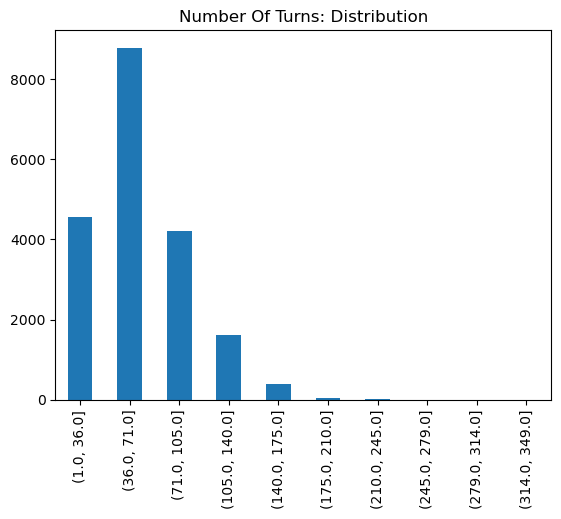

In [47]:
turns_distributions = pd.cut(data['turns'], 10, precision=0).value_counts().sort_index().plot.bar()
turns_distributions = turns_distributions.set(title = "Number Of Turns: Distribution")

In [ ]:
### We can see that majority of games concluded in less than 71 moves

### 5. What is victory status of top players?

In [48]:
data.head(1)

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   

   white_id  white_rating black_id  black_rating  \
0  bourgris          1500     a-00          1191   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   

                       opening_name  opening_ply category  increment  \
0  Slav Defense: Exchange Variation            5    rapid          2   

   rate_difference  
0  white high rate

In [49]:
list_of_top_players=all_matches2.sort_values("win_percentage",ascending=False)[:15]['Player_ID']

In [50]:
list_of_top_players.values

array(['smartduckduckcow', 'lichessfiend', 'amir2002zzz', 'projetoxadrez',
       'mmichael', 'chesswithmom', 'runcrazex', 'steelviper', 'mrzoom47',
       'plausibletheory', 'futuro_gm22', 'tony995', 'siindbad', 'honza7',
       'chesscarl'], dtype=object)

In [51]:
matches = data[data['white_id'].isin(list_of_top_players.values)]

In [52]:
matches2=data[data['black_id'].isin(list_of_top_players.values)]

In [53]:
matches.append(matches2)['victory_status'].value_counts()

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\2637041044.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches.append(matches2)['victory_status'].value_counts()


resign       168
mate         101
draw          15
outoftime     15
Name: victory_status, dtype: int64

In [54]:
matches.append(matches2)['victory_status'].value_counts()[0]/matches.append(matches2).shape[0]

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\3236070346.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches.append(matches2)['victory_status'].value_counts()[0]/matches.append(matches2).shape[0]
C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\3236070346.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches.append(matches2)['victory_status'].value_counts()[0]/matches.append(matches2).shape[0]


0.5618729096989966

In [55]:
matches.append(matches2)['victory_status'].value_counts()[1]/matches.append(matches2).shape[0]

C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\1275786643.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches.append(matches2)['victory_status'].value_counts()[1]/matches.append(matches2).shape[0]
C:\Users\shikh\AppData\Local\Temp\ipykernel_20376\1275786643.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches.append(matches2)['victory_status'].value_counts()[1]/matches.append(matches2).shape[0]


0.3377926421404682

In [ ]:
## We can see that top players won their games 56 percent with resign and 33 percent with mate.

### 6. Opening game is affect who won the game (black or white)

In [71]:
opening_names=data['opening_name'].value_counts()[:30].index

In [72]:
opening_names

Index(['Van't Kruijs Opening', 'Sicilian Defense',
       'Sicilian Defense: Bowdler Attack', 'French Defense: Knight Variation',
       'Scotch Game', 'Scandinavian Defense: Mieses-Kotroc Variation',
       'Queen's Pawn Game: Mason Attack',
       'Queen's Pawn Game: Chigorin Variation', 'Scandinavian Defense',
       'Horwitz Defense', 'Caro-Kann Defense', 'Philidor Defense #2',
       'Philidor Defense #3', 'Indian Game', 'Modern Defense',
       'Italian Game: Anti-Fried Liver Defense', 'Owen Defense',
       'Four Knights Game: Italian Variation',
       'King's Pawn Game: Wayward Queen Attack',
       'Sicilian Defense: Old Sicilian',
       'King's Pawn Game: Leonardis Variation', 'Queen's Pawn Game',
       'Philidor Defense', 'Ruy Lopez: Steinitz Defense', 'Queen's Pawn',
       'Bishop's Opening', 'Queen's Gambit Refused: Marshall Defense',
       'Hungarian Opening', 'French Defense: Normal Variation',
       'Queen's Gambit Declined'],
      dtype='object')

In [73]:
matches_opening_name = data[data['opening_name'].isin(opening_names)]

In [74]:
matches_opening_name

id  rated    created_at  last_move_at  turns victory_status  \
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
9      afoMwnLg   True  1.503440e+12  1.503440e+12    119           mate   
10     HgKLWPsz  False  1.503350e+12  1.503350e+12     39           mate   
12     HRti5mKv  False  1.503350e+12  1.503350e+12     60         resign   
14     u7i6dOaJ  False  1.504090e+12  1.504100e+12     31           mate   
16     PmpkWkmm  False  1.504090e+12  1.504090e+12     52         resign   
17     EwaK0IsE  False  1.504010e+12  1.504010e+12     66           mate   
18     yrSDozT3  False  1.504010e+12  1.504010e+12    101         resign   
19     x31mXlvc  False  1.503760e+12  1.503760e+12     25         resign   
20     oQklnWWp  False  1.502950e+12  1.502950e+12     14         resign   
21     QFCZwY1f  False  1.502950e+12  1.502950e+12      3         resign   
22     5cgBygpI  False  1.502950e+12  1.502950e+12     17         resign   
25     ifUMWtVj   True  1.502780e+12  1.502780e+12     69           mate   
27     srz9QfSN   True  1.502780e+12  1.502780e+12     54           mate   
29     M3vpf2Ki   True  1.502780e+12  1.502780e+12     66           mate   
32     FSkgvV2E   True  1.502780e+12  1.502780e+12     54         resign   
34     Lq24M4KQ  False  1.502430e+12  1.502430e+12     11         resign   
37     OR6aULrW  False  1.502210e+12  1.502210e+12     22         resign   
45     mpzYDfIK  False  1.499330e+12  1.499330e+12     49         resign   
46     27zreJYy  False  1.499330e+12  1.499330e+12      3         resign   
47     IRYkgI8N  False  1.499320e+12  1.499320e+12      7         resign   
49     iq3Kz06t  False  1.498400e+12  1.498410e+12     41           mate   
50     AAw1TiNN  False  1.497980e+12  1.497980e+12      5         resign   
58     i2GBGO0R   True  1.504140e+12  1.504140e+12     44         resign   
60     9tU9MM6P   True  1.504230e+12  1.504230e+12     37         resign   
61     ztpC1S2c   True  1.503970e+12  1.503970e+12     49         resign   
62     qc8aH5XL   True  1.503970e+12  1.503970e+12     32         resign   
66     6QAiH2Yy   True  1.503890e+12  1.503890e+12     57         resign   
68     nG3Of11I   True  1.503790e+12  1.503790e+12     61         resign   
69     cUzM68JF   True  1.503710e+12  1.503710e+12     44         resign   
70     NZSBXWl2   True  1.503710e+12  1.503710e+12     62           mate   
71     DHuXFP6C   True  1.503700e+12  1.503700e+12     87           mate   
73     IN15cBnB   True  1.503690e+12  1.503690e+12     54         resign   
75     oWFQ8mnz   True  1.503690e+12  1.503690e+12     50         resign   
80     ThCXomTn   True  1.503540e+12  1.503540e+12     61         resign   
84     d62Tg4dc   True  1.503450e+12  1.503450e+12     71         resign   
85     TaSQfvww   True  1.503440e+12  1.503440e+12    114         resign   
88     MfNml1rl   True  1.503430e+12  1.503430e+12     48         resign   
89     mEAvshF2   True  1.503370e+12  1.503370e+12     34           mate   
95     TVfozmF5   True  1.503360e+12  1.503360e+12     85           mate   
98     h1unxHlo   True  1.504200e+12  1.504200e+12    113           draw   
99     OIyTAHCP   True  1.504190e+12  1.504190e+12     62         resign   
101    ZzWyY1f8   True  1.503540e+12  1.503540e+12     75      outoftime   
103    aVwWNjNR   True  1.503540e+12  1.503540e+12     81      outoftime   
105    Tlng5eqN   True  1.503540e+12  1.503540e+12     70           mate   
126    gHld9WSr   True  1.503910e+12  1.503910e+12    120           draw   
128    TKwuIzb6   True  1.503830e+12  1.503840e+12     26           mate   
131    dRhehsEy   True  1.503670e+12  1.503670e+12     24         resign   
132    7rbdtPwO  False  1.503420e+12  1.503420e+12     47         resign   
142    R6dF4yRx   True  1.503090e+12  1.503090e+12     97           mate   
144    p7a4FGwp   True  1.503090e+12  1.503090e+12     30    

In [68]:
matches_opening_name=pd.set_option("display.max_rows",None)

In [75]:
df=matches_opening_name.groupby("opening_name")['winner'].value_counts().to_frame()

In [76]:
df['count_of_wins']=df.values

In [77]:
df['winner']=df.index

In [78]:
df.columns

Index(['winner', 'count_of_wins'], dtype='object')

In [79]:
df.reset_index(drop=True,inplace=True)

In [80]:
df=df.drop(df.index[2::3]).reset_index(drop=True)

In [94]:
df["difference"]=abs(df['count_of_wins'].diff().where(df.index % 2 != 0, df['count_of_wins'])[1::2])

In [96]:
df["total"]=df['count_of_wins'].add(df['count_of_wins'].shift(1)).where(df.index % 2 != 0, df['count_of_wins'])[1::2]

In [111]:
df['win_percentage']=(df['count_of_wins']+df['difference'])/df['total']

In [116]:
df[df['win_percentage']>0.6]

winner  count_of_wins  \
9           (French Defense: Normal Variation, black)             46   
27                          (Philidor Defense, black)             42   
31                       (Philidor Defense #3, black)             64   
35  (Queen's Gambit Refused: Marshall Defense, black)             41   
37                              (Queen's Pawn, black)             39   
39                         (Queen's Pawn Game, white)             52   
49  (Scandinavian Defense: Mieses-Kotroc Variation...             88   
57            (Sicilian Defense: Old Sicilian, white)             59   
59                      (Van't Kruijs Opening, white)            123   

    difference  total  win_percentage  
9         28.0  120.0        0.616667  
27        40.0  124.0        0.661290  
31        56.0  184.0        0.652174  
35        43.0  125.0        0.672000  
37        46.0  124.0        0.685484  
39        27.0  131.0        0.603053  
49        71.0  247.0        0.643725  
57        32.0  150.0        0.606667  
59       101.0  347.0        0.645533